In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# Cable cars in San Francisco

Suppose there are $N \in \mathbb{N}$ cable cars in San Francisco, numbered sequentially from $1$ to $N$. You see a cable car at random, say #$203$.

**Question:** What is your estimate for $N$?

## Prior beliefs

Although this exercise doesn't provide a lot of information, you can get a lot out of it with a Bayesian approach. We first decide on a geometric prior with mean $100$, that is

$$
p(N) = p_0 \, (1 - p_0)^{N - 1},
$$

where $p_0 = 1 / 100$. The likelihood function is given by

$$
p(\text{data} | N) = \frac{1}{N}, \quad \text{for} \,\, N \geq 203
$$

and using **Bayes theorem** the posterior distribution for $N$ is proportional to

$$
p(N | \text{data}) \propto p(N) \, p(\text{data} | N).
$$

In [8]:
cable_car = 203
p0 = 0.01

geometric_prior = lambda N: p0 * (1 - p0) ** (N - 1)
likelihood = lambda N: np.where(N >= cable_car, 1 / N, 0)
posterior = lambda N: geometric_prior(N) * likelihood(N)

In [9]:
normalize_pdf = lambda pdf: pdf / pdf.sum()

In [10]:
def calculate_mean(pdf):
    x = np.arange(1, 1000)
    pdf = normalize_pdf(pdf(x))
    return np.sum(x * pdf)

In [11]:
def calculate_quantile(pdf, q):
    x = np.arange(1, 1000)
    cdf = np.cumsum(normalize_pdf(pdf(x)))
    return x[np.argmin(np.abs(cdf - q))]

Posterior mean: 279.020
Posterior median: 253


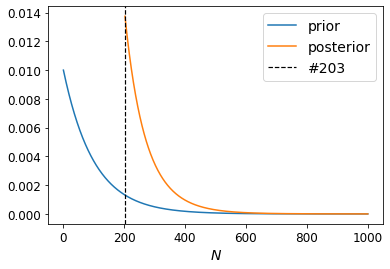

In [12]:
post_mean = calculate_mean(posterior)
post_median = calculate_quantile(posterior, q=0.50)
print(f"Posterior mean: {post_mean:.3f}")
print(f"Posterior median: {post_median}")

X = np.arange(1000) + 1
plt.plot(X, geometric_prior(X), label="prior")
x = np.arange(cable_car - 1, 1000) + 1
plt.plot(x, normalize_pdf(posterior(x)), label="posterior")
plt.axvline(x=cable_car, label=f"#{cable_car}", ls="--", lw=1.2, c="k")
plt.xlabel(r"$N$")
plt.legend();

## More than one observation

Assume now to observe not only one cable car, but the cars with numbers #$203$, #$157$, and #$222$. We want to update the posterior summary statistics after each observation and visualize the corresponding posterior updates. Note that the likelihood now changes to the product of all likelihoods, that is

$$
p(\text{data}| N) = \left(\frac{1}{N}\right)^n, \quad \text{for} \,\, N \geq \max \{\text{data}\},
$$

where $n$ is the number of observed cable cars.

In [16]:
def update_procedure(data, prior):
    """
    Plots posterior distributions for 'N'
    and prints summarizing statistics.
    """
    plt.plot(X, prior(X), label="prior")
    
    print("----- START UPDATES -----")
    for i, y in enumerate(data):
        print(f"-> UPDATE {i+1}: Spotted cable car #{y}")

        likelihood = lambda N: np.where(N >= max(data[:(i+1)]), (1 / N) ** (i+1), 0)
        posterior = lambda N: prior(N) * likelihood(N)

        x = np.arange(np.max(data[:i+1]) - 1, 1000) + 1
        
        mean = calculate_mean(posterior)
        median = calculate_quantile(posterior, q=.50)
        iqr = calculate_quantile(posterior, q=.75) - calculate_quantile(posterior, q=.25)

        print(f"mean: {mean:.3f}")
        print(f"median: {median}")
        print(f"iqr: {iqr}")
        if i + 1 != len(data): print("----------------")

        plt.plot(x, normalize_pdf(posterior(x)), label=f"post {i+1} - car #{y}")

    plt.xlabel(r"$N$", size=14)
    plt.legend()

----- START UPDATES -----
-> UPDATE 1: Spotted cable car #203
mean: 279.020
median: 253
iqr: 84
----------------
-> UPDATE 2: Spotted cable car #157
mean: 263.065
median: 242
iqr: 66
----------------
-> UPDATE 3: Spotted cable car #222
mean: 272.572
median: 255
iqr: 55


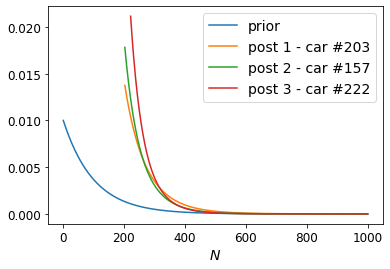

In [17]:
data = [203, 157, 222]
update_procedure(data, geometric_prior)

## Even more cable cars observed

----- START UPDATES -----
-> UPDATE 1: Spotted cable car #203
mean: 279.020
median: 253
iqr: 84
----------------
-> UPDATE 2: Spotted cable car #157
mean: 263.065
median: 242
iqr: 66
----------------
-> UPDATE 3: Spotted cable car #222
mean: 272.572
median: 255
iqr: 55
----------------
-> UPDATE 4: Spotted cable car #32
mean: 264.391
median: 249
iqr: 47
----------------
-> UPDATE 5: Spotted cable car #143
mean: 258.231
median: 245
iqr: 40
----------------
-> UPDATE 6: Spotted cable car #218
mean: 253.485
median: 242
iqr: 34


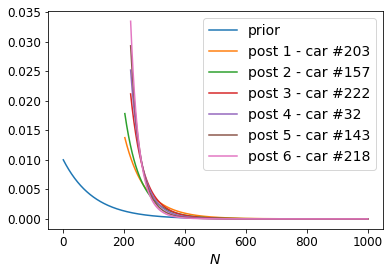

In [18]:
data = [203, 157, 222, 32, 143, 218]
update_procedure(data, geometric_prior)